<a href="https://colab.research.google.com/github/erayonler/image-augmentation-in-agriculture/blob/main/image_augmentation_in_agriculture_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. INTRODUCTION




## 1.1. Import Libraries

In [ ]:
# importing all libraries that we will use 
import albumentations as A
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 1.2. Dataset

@article{rauf2019citrus,
  title={A citrus fruits and leaves dataset for detection and classification of citrus diseases through machine learning},

  author={Rauf, Hafiz Tayyab and Saleem, Basharat Ali and Lali, M Ikram Ullah
and Khan, Muhammad Attique and Sharif, Muhammad and Bukhari, Syed Ahmad Chan},

  journal={Data in brief},

  volume={26},

  pages={104340},

  year={2019},

  publisher={Elsevier}
  
}

In [ ]:
# load the dataset
citrus, info = tfds.load("CitrusLeaves", with_info=True, split="train", as_supervised=True)

In [ ]:
# convert dataset to pandas dataframe
df = pd.DataFrame(list(citrus))


df[1] = df[1].apply(lambda x: x.numpy()) #convert labels to numpy array
df[0] = df[0].apply(lambda x: x.numpy()) #convert images to numpy array

df.columns = ["image", "label"] # change column names of dataset

In [ ]:
labels =  ["Black Spot", "Canker", "Greening", "Healthy"] # list of labels for label name decoding

In [ ]:
black_spot = df[df.label==0] # dataset that contain just black spot class images
canker = df[df.label==1] # dataset that contain just canker class images
greening = df[df.label==2] # dataset that contain just greening class images
healthy = df[df.label==3] # dataset that contain just healthy class images

Text(0.5, 1.0, 'Greening')

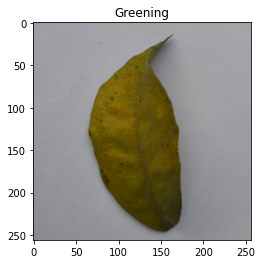

In [ ]:
# visualize sample image
img = df.iloc[5][0]
label = df.iloc[5][1]

plt.imshow(img)
plt.title(labels[label])

In [ ]:
# Get information about the dataset
print("Number of images in dataset is : " +str(df.count()["image"]))
print("Number of images in Black spot class is : " +str(black_spot.count()["image"]))
print("Number of images in Canker class is : " +str(canker.count()["image"]))
print("Number of images in Greening class is : " +str(greening.count()["image"]))
print("Number of images in Healhty is : " +str(healthy.count()["image"]))

Number of images in dataset is : 594
Number of images in Black spot class is : 169
Number of images in Canker class is : 163
Number of images in Greening class is : 204
Number of images in Healhty is : 58


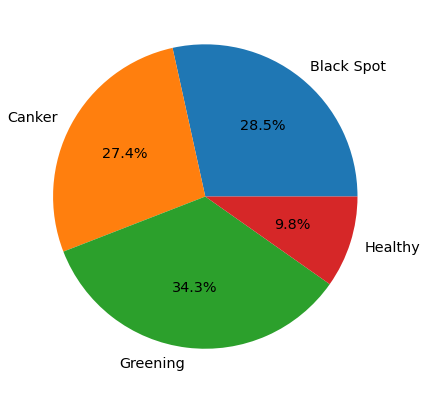

In [ ]:
# plotting class variation
plt.figure(figsize=(7,7))
plt.pie([df[df.label==0].count()["image"], df[df.label==1].count()["image"], df[df.label==2].count()["image"], df[df.label==3].count()["image"]],
        labels= labels,
        autopct='%1.1f%%',
        textprops={"color":"black", "size":"x-large"})
plt.show()

In [ ]:
# function to choose number of random image from the dataset

def choose_random(data, number_of_image):
  '''
  data: pandas dataframe
  number_of_image: how many image you want to pick randomly
  '''
  result = []
  for i in range(number_of_image):
    rand = random.randint(0, data.shape[0])
    img = data.iloc[rand][0]
    label = data.iloc[rand][1]
    result.append((img, label))
  return result

In [ ]:
# create random image list from different classes
number_of_image = 5

rand_black_spot = choose_random(black_spot, number_of_image)
rand_canker = choose_random(canker, number_of_image)
rand_greening = choose_random(greening, number_of_image)
rand_healthy = choose_random(healthy, number_of_image)

In [ ]:
# merge all random image lists into one list
rand_total = rand_black_spot+rand_canker+rand_greening+rand_healthy

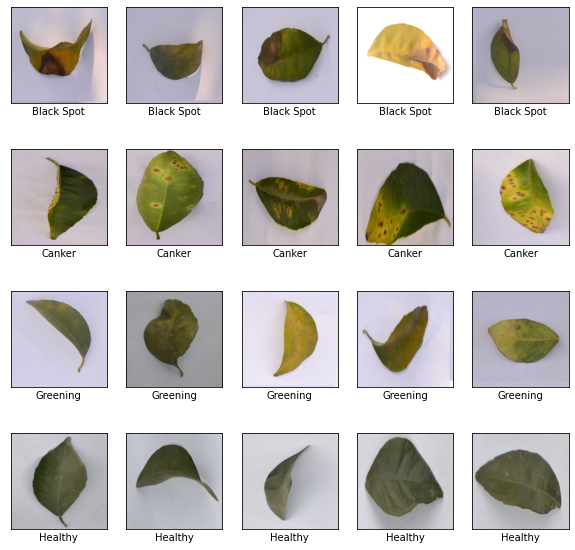

In [ ]:
# visualize random images
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(rand_total[i][0], cmap=plt.cm.binary)
    plt.xlabel(labels[rand_total[i][1]])
plt.show()

In [ ]:
# Create list of augmentation methods

def create_augmentation_list(p=0.5):
  a = A.Blur(p)
  b = A.RandomCrop(width=256, height=256, p)
  c = A.HorizontalFlip(p)
  d = A.RandomBrightnessContrast(p)
  e = A.RandomRain(p)
  f = A.Solarize(p)
  g = A.Superpixels(p)
  h = A.RandomSnow(p)
  i = A.RandomFog(p)
  j = A.MotionBlur(p)
  k = A.RandomSunFlare(p)
  l = A.ISONoise(p)

  augmentation_list = [(a, "Blur"), (b, "Random Crop"), (c, "Horizontal Flip"), (d, "Random Brightness Contrast"), 
                      (e, "Random Rain"), (f, "Solarize"), (g, "Superpixels"), (h, "Random Snow"), (i, "Random Fog") ,
                      (j, "Motion Blur"), (k, "Random Sun Flare"), (l, "ISO Noise")]
  return augmentation_list

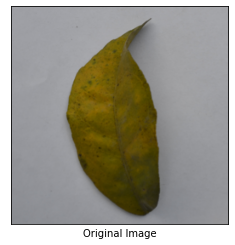

In [ ]:
# Image sample for data augmentation

img = df.iloc[5][0]

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel("Original Image")
plt.show()

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/functional.py:1856: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = skimage.segmentation.slic(image, n_segments=n_segments, compactness=10)


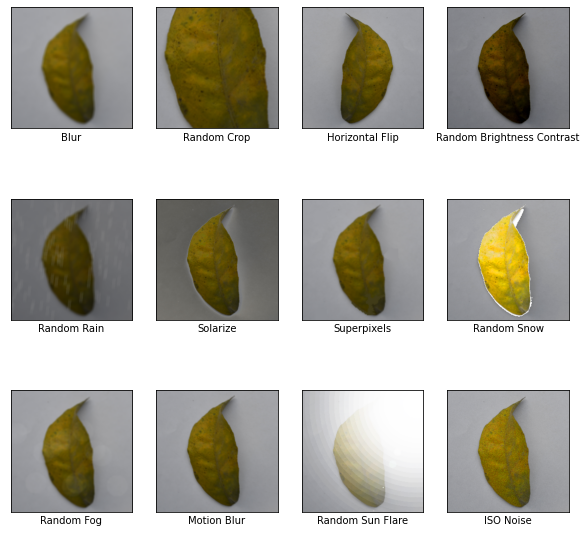

In [ ]:
# Visualize augmented images

augmentation_list = create_augmentation_list(p=1)

plt.figure(figsize=(10,10))
for i in range(12):
  transform = A.Compose([augmentation_list[i][0]])
  img_aug = transform(image=img)


  plt.subplot(3,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img_aug["image"], cmap=plt.cm.binary)
  plt.xlabel(augmentation_list[i][1])
plt.show()

# 2. CASE STUDY

### 2.1. Splitting data into training and test sets

In [ ]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["image"], df["label"], test_size=0.33, random_state=42) # Split the whole dataset into traning and test datasets

In [ ]:
X_test.count() # Size of test dataset

197

In [ ]:
X_train.count() # Size of training dataset

397

### 2.2. Augmentation of training dataset

In [ ]:
# create augmented image and label list
X_augmented = []
y_augmented = []
augmentation_list = create_augmentation_list(p=0.5)

for i in range(3): # this range is identifying that augmented dataset will be 3 times bigger than original one
  for index in X_train.index:
    img = X_train[index]
    label = y_train[index]
    rand = random.randint(0,11) # choose random augmentation method from our augmentation list
    augmentor = augmentation_list[rand][0]
    transform = A.Compose([augmentor])
    img_aug = transform(image=img)
    X_augmented.append(img_aug["image"])
    y_augmented.append(label)

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/functional.py:1856: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = skimage.segmentation.slic(image, n_segments=n_segments, compactness=10)


In [ ]:
len(X_augmented)

1191

### 2.3. Preparing training, augmented training and test datasets for machine learning model

In [ ]:
# converting our training, test and augmented training datasets into tensors

train_images = tf.convert_to_tensor(X_train.to_list())
train_labels = tf.convert_to_tensor(y_train.to_list())

test_images = tf.convert_to_tensor(X_test.to_list())
test_labels = tf.convert_to_tensor(y_test.to_list())

train_images_augmented = tf.convert_to_tensor(X_augmented)
train_labels_augmented = tf.convert_to_tensor(y_augmented)

### 2.4. Model for Training without Data Augmentation

In [ ]:
# specifiy the image size and create base model for transfer learning

IMG_SHAPE = (256,256,3)
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# define and compile our ML model

inputs = tf.keras.Input(shape=IMG_SHAPE)
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])


history = model.fit(train_images, train_labels, epochs=5) # train 5 epochs for heating the model parameters

Epoch 1/5
13/13 [==============================] - 174s 12s/step - loss: 1.3645 - accuracy: 0.3375
Epoch 2/5
13/13 [==============================] - 138s 11s/step - loss: 1.2101 - accuracy: 0.4358
Epoch 3/5
13/13 [==============================] - 136s 10s/step - loss: 0.8745 - accuracy: 0.5592
Epoch 4/5
13/13 [==============================] - 137s 11s/step - loss: 1.1532 - accuracy: 0.4736
Epoch 5/5
13/13 [==============================] - 139s 11s/step - loss: 0.8292 - accuracy: 0.5793


In [ ]:
# unfreeze last 10 layers of transfer learning model to continue training

base_model.trainable = True
fine_tune_at = 10

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
# train 55 more epochs 

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history_tuning = model.fit(train_images, train_labels, epochs=60, initial_epoch=history.epoch[-1])

Epoch 5/60
13/13 [==============================] - 130s 9s/step - loss: 0.7078 - accuracy: 0.6272
Epoch 6/60
13/13 [==============================] - 122s 9s/step - loss: 0.7004 - accuracy: 0.6272
Epoch 7/60
13/13 [==============================] - 119s 9s/step - loss: 0.6979 - accuracy: 0.6322
Epoch 8/60
13/13 [==============================] - 122s 9s/step - loss: 0.6944 - accuracy: 0.6398
Epoch 9/60
13/13 [==============================] - 118s 9s/step - loss: 0.6901 - accuracy: 0.6398
Epoch 10/60
13/13 [==============================] - 125s 10s/step - loss: 0.6844 - accuracy: 0.6398
Epoch 11/60
13/13 [==============================] - 120s 9s/step - loss: 0.6782 - accuracy: 0.6398
Epoch 12/60
13/13 [==============================] - 123s 9s/step - loss: 0.6694 - accuracy: 0.6398
Epoch 13/60
13/13 [==============================] - 124s 9s/step - loss: 0.6595 - accuracy: 0.6423
Epoch 14/60
13/13 [==============================] - 121s 9s/step - loss: 0.6483 - accuracy: 0.6499
Epoc

In [ ]:
# test the model with test dataset

y_pred = model.predict(test_images)
y_prediction = [item.argmax() for item in y_pred]
y_test = np.array(test_labels).tolist()

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        60
           1       0.94      1.00      0.97        49
           2       0.81      0.64      0.72        69
           3       0.95      0.95      0.95        19

    accuracy                           0.81       197
   macro avg       0.84      0.85      0.84       197
weighted avg       0.81      0.81      0.80       197



### 2.5. Model for Training with Data Augmentation

In [ ]:
IMG_SHAPE = (256,256,3)
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False)

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

model_augmented.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history_augmented = model_augmented.fit(train_images_augmented, train_labels_augmented, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


38/38 [==============================] - 403s 10s/step - loss: 1.3854 - accuracy: 0.3241
Epoch 2/5
38/38 [==============================] - 388s 10s/step - loss: 1.3822 - accuracy: 0.3510
Epoch 3/5
38/38 [==============================] - 382s 10s/step - loss: 1.3760 - accuracy: 0.3988
Epoch 4/5
38/38 [==============================] - 375s 10s/step - loss: 1.3588 - accuracy: 0.4828
Epoch 5/5
38/38 [==============================] - 379s 10s/step - loss: 1.2931 - accuracy: 0.5441


In [ ]:
base_model.trainable = True
fine_tune_at = 10

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

model_augmented.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history_augmented_tuning = model_augmented.fit(train_images_augmented, train_labels_augmented, epochs=60, initial_epoch=history_augmented.epoch[-1])

Epoch 5/60
38/38 [==============================] - 365s 9s/step - loss: 1.1814 - accuracy: 0.5558
Epoch 6/60
38/38 [==============================] - 354s 9s/step - loss: 1.0923 - accuracy: 0.5709
Epoch 7/60
38/38 [==============================] - 353s 9s/step - loss: 1.0098 - accuracy: 0.5835
Epoch 8/60
38/38 [==============================] - 352s 9s/step - loss: 0.9162 - accuracy: 0.6541
Epoch 9/60
38/38 [==============================] - 352s 9s/step - loss: 0.7431 - accuracy: 0.8102
Epoch 10/60
38/38 [==============================] - 351s 9s/step - loss: 0.4837 - accuracy: 0.8463
Epoch 11/60
38/38 [==============================] - 350s 9s/step - loss: 0.3190 - accuracy: 0.8615
Epoch 12/60
38/38 [==============================] - 352s 9s/step - loss: 0.2375 - accuracy: 0.9110
Epoch 13/60
38/38 [==============================] - 349s 9s/step - loss: 0.1791 - accuracy: 0.9622
Epoch 14/60
38/38 [==============================] - 349s 9s/step - loss: 0.1875 - accuracy: 0.9589
Epoch

In [ ]:
y_pred = model_augmented.predict(test_images)
y_prediction = [item.argmax() for item in y_pred]
y_test = np.array(test_labels).tolist()
print(classification_report(y_test, y_prediction))

7/7 [==============================] - 19s 2s/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.98      0.96      0.97        49
           2       0.90      0.88      0.89        69
           3       0.95      1.00      0.97        19

    accuracy                           0.91       197
   macro avg       0.92      0.93      0.93       197
weighted avg       0.91      0.91      0.91       197

